# Multi Layer Perceptron - Fashion MNIST

We will be starting with a classification exercise. And using the **Fashion Mnist** dataset to do so. It involves identifying the 10 types of products that are there in the image.

- Train: 60,000 images
- Test: 10,000 images
- Class: 10
- Labels: 
 - 0: T-shirt/top
 - 1: Trouser
 - 2: Pullover
 - 3: Dress
 - 4: Coat
 - 5: Sandal
 - 6: Shirt
 - 7: Sneaker
 - 8: Bag
 - 9: Ankle boot

### Get Input and Output

In [13]:
import numpy as np
import keras
import tensorflow as tf

In [14]:
from keras.datasets import fashion_mnist
from helpers import fashion_mnist_label

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [29]:
label = fashion_mnist_label()
label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### See an Image

In [59]:
import vis

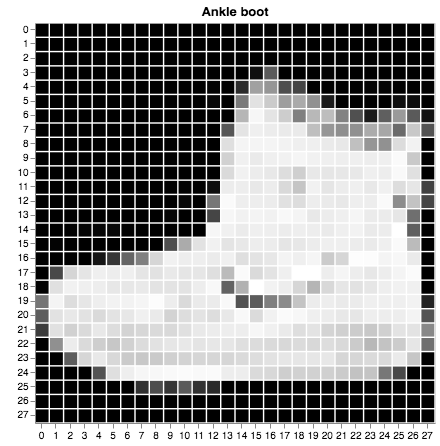

In [60]:
vis.imshow(x_train[0], label = label[y_train[0]])

### See an Image from each class

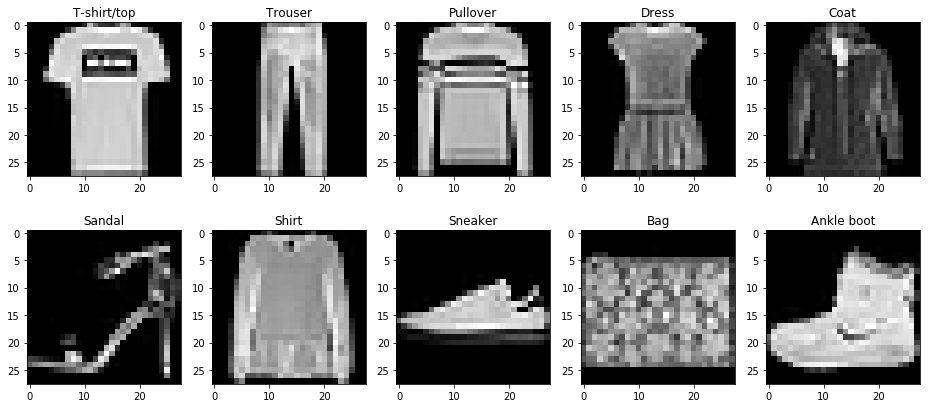

In [11]:
# Lets plot one image from each class
u, indices = np.unique(y_train, return_index=True)
plt.figure(figsize = (16,7))
for i in u:
    plt.subplot(2,5,i+1)
    image(indices[i])

#### See 500 of the Images

In [12]:
from helpers import create_sprite, create_embedding

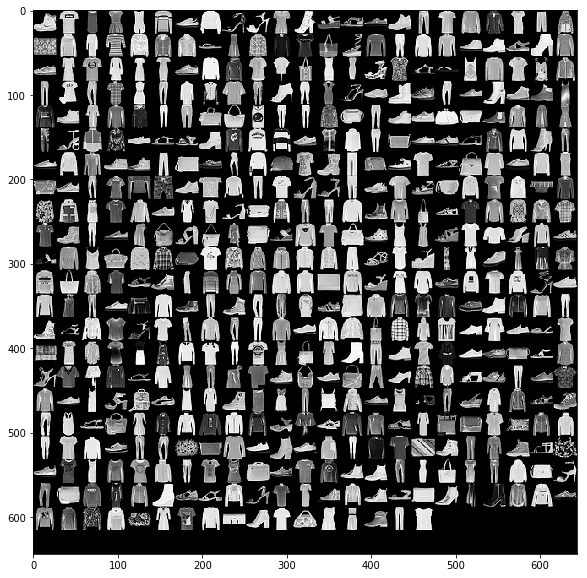

In [13]:
sprite = create_sprite(x_train[:500])
plt.figure(figsize = (10,10))
plt.imshow(sprite,cmap='gray')

## Deep Learning Approach - Single Layer

![](img/single_dl.png)

Lets learn both the representation and the classifier together now

**Step 1: Prepare the images and labels**

Convert from 'uint8' to 'float32' and normalise the data to (0,1) 

In [61]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

Flatten the data from (60000, 28, 28) to (60000, 784)

In [84]:
x_train_flatten = x_train.reshape(60000, 28 * 28)
x_test_flatten = x_test.reshape(10000, 28 * 28)

Convert class vectors to binary class matrices

In [85]:
from keras.utils import to_categorical
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

**Step 2: Craft the feature transfomation and classifier model **

In [86]:
from keras import Sequential
from keras.layers import Dense, Activation

In [89]:
model_single_dl = Sequential()
model_single_dl.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model_single_dl.add(Dense(10, activation='softmax'))

In [90]:
model_single_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Step 3: Compile and fit the model**

In [91]:
model_single_dl.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [92]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/single-dl')

In [109]:
model_single_dl.fit?

Signature: model_single_dl.fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs)
Docstring:
Trains the model for a fixed number of epochs (iterations on a dataset).

# Arguments
    x: Numpy array of training data.
        If the input layer in the model is named, you can also pass a
        dictionary mapping the input name to a Numpy array.
        `x` can be `None` (default) if feeding from
        framework-native tensors (e.g. TensorFlow data tensors).
    y: Numpy array of target (label) data.
        If the output layer in the model is named, you can also pass a
        dictionary mapping the output name to a Numpy array.
        `y` can be `None` (default) if feeding from
        framework-native tensors (e.g. TensorFlow data tensors).
    batch_size: Integer or `None`.
        Number of samp

In [106]:
%%time 
history = model_single_dl.fit(x_train_flatten, y_train_class, batch_size=20, epochs=2, verbose=1,
                    validation_data=(x_test_flatten, y_test_class),
                    callbacks=[tbCallBack])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 140us/step - loss: 0.2991 - acc: 0.8909 - val_loss: 0.3484 - val_acc: 0.8757
Epoch 2/2
60000/60000 [==============================] - 8s 139us/step - loss: 0.2890 - acc: 0.8951 - val_loss: 0.3444 - val_acc: 0.8759
CPU times: user 46 s, sys: 12.2 s, total: 58.2 s
Wall time: 16.9 s


**Step 4: Check the performance of the model**

In [107]:
history.history

{'val_loss': [0.3483752790056169, 0.3443950579203665],
 'val_acc': [0.875699998497963, 0.8758999971151352],
 'loss': [0.29906856519325326, 0.2889791855017344],
 'acc': [0.8908666628996531, 0.8950833293398222]}

In [95]:
score = model_single_dl.evaluate(x_test_flatten, y_test_class, verbose=1)

10000/10000 [==============================] - 0s 34us/step


In [49]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4913594557285309
Test accuracy: 0.8315


**Step 5: Make & Visualise the Prediction**

In [50]:
model_single_dl.predict_proba(x_test_flatten)[0]

array([5.8653436e-06, 9.1164952e-07, 1.8567956e-05, 2.4364421e-05,
       2.6839689e-05, 2.7425189e-02, 5.7469337e-05, 4.8601028e-02,
       9.5510995e-03, 9.1428870e-01], dtype=float32)

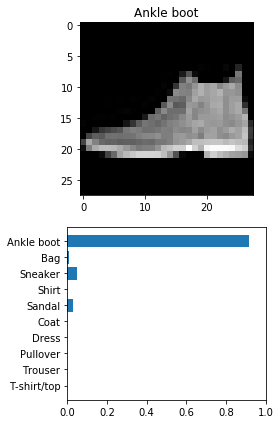

In [51]:
plot_prediction(0, x_test, y_test, x_test_flatten, model_single_dl)

## Deep Learning Approach - Multi Layer Perceptron

**Step 2 & 3: Craft the feature transfomation and classifier model **

In [101]:
model_multi_dl = Sequential()
model_multi_dl.add(Dense(100, input_shape=(784,), activation='sigmoid'))
model_multi_dl.add(Dense(50, activation='sigmoid'))
model_multi_dl.add(Dense(10, activation='softmax'))

In [102]:
model_multi_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [103]:
model_multi_dl.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [104]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/multi-dl')

In [105]:
%%time 
model_multi_dl.fit(x_train_flatten, y_train_class, batch_size=128, epochs=2, verbose=1,
                    validation_data=(x_test_flatten, y_test_class),
                    callbacks=[tbCallBack, history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 23us/step - loss: 2.2845 - acc: 0.2545 - val_loss: 2.2250 - val_acc: 0.4255
Epoch 2/2
60000/60000 [==============================] - 1s 21us/step - loss: 2.1704 - acc: 0.4688 - val_loss: 2.1071 - val_acc: 0.4655
CPU times: user 7.2 s, sys: 620 ms, total: 7.82 s
Wall time: 3 s


**Step 5: Check the performance of the model**

In [57]:
score = model_multi_dl.evaluate(x_test_flatten, y_test_class, verbose=1)

10000/10000 [==============================] - 0s 49us/step


In [58]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.388753424453735
Test accuracy: 0.0997


**Step 6: Make & Visualise the Prediction**

In [59]:
model_multi_dl.predict_proba(x_test_flatten)[0]

array([0.11647817, 0.13288964, 0.09337792, 0.13705982, 0.10375784,
       0.06192795, 0.15350011, 0.03354678, 0.10829023, 0.0591715 ],
      dtype=float32)

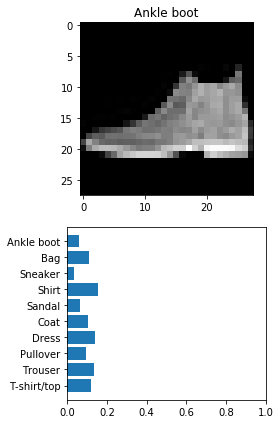

In [60]:
plot_prediction(0, x_test, y_test, x_test_flatten, model_multi_dl)